<a href="https://www.kaggle.com/code/priteshsharadvedak/what-makes-a-country-happier-exploratory-da?scriptVersionId=107092986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# World Happiness Report 2019 Exploratory Data Analysis

<img src="https://media0.giphy.com/media/z8XtwKGIRQSBCmU4sW/giphy.gif?cid=ecf05e473jza97bdh0d4s4lz5wlcmt2omzq67mam2knvm697&rid=giphy.gif&ct=g">

## What makes you happy? Is it money? Is it your family? What is the reason of a country being happier than that of others? Is your country amongst 10 happiest countries?
## Let's find out...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2019=pd.read_csv(r"../input/world-happiness/2019.csv")
df2018=pd.read_csv(r"../input/world-happiness/2018.csv")
df2017=pd.read_csv(r"../input/world-happiness/2017.csv")
df2016=pd.read_csv(r"../input/world-happiness/2016.csv")
df2015=pd.read_csv(r"../input/world-happiness/2015.csv")

In [3]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [5]:
dfmean=df2019.loc[:, df2019.columns.drop(['Overall rank', 'Score'])].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [6]:
dfmean

GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

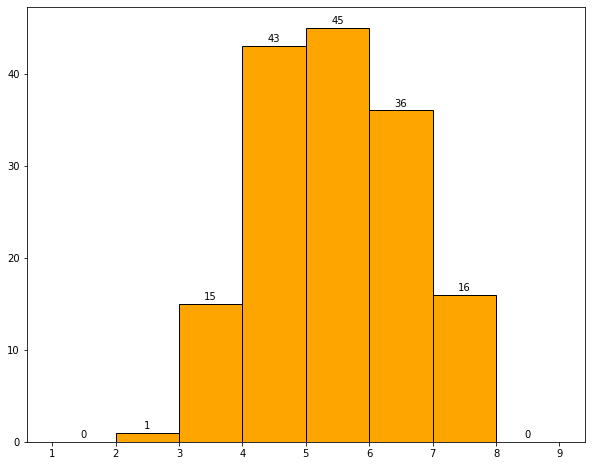

In [7]:
fig,ax = plt.subplots(figsize=(10,8))
hist=plt.hist(df2019['Score'],color='orange',edgecolor='black',bins=[1,2,3,4,5,6,7,8,9])
for hist in ax.containers:
    ax.bar_label(hist,padding=2)

## 45 countries have happiness score between 5 and 6 which is the most. 43 countries have happiness score between 4 and 5 which is the 2nd most. From the histogram it can be concluded that the major of the countries have haappiness score between 4 and 7.

<br>

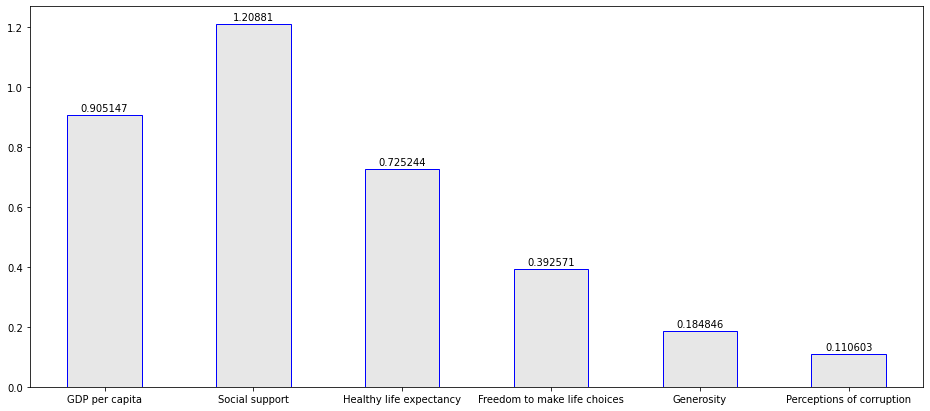

In [8]:
fig,ax = plt.subplots(figsize=(16,7))
x=dfmean.iloc[0]
y=dfmean.iloc[1]
bars=dfmean.plot.bar(x,y, color=(0.1,0.1,0.1,0.1),edgecolor='blue')
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars,padding=2)

## Hence Social support has most contribution to the happiness of people implementing that people need others to support them and are responsible to keep them happy

<br>

<AxesSubplot:>

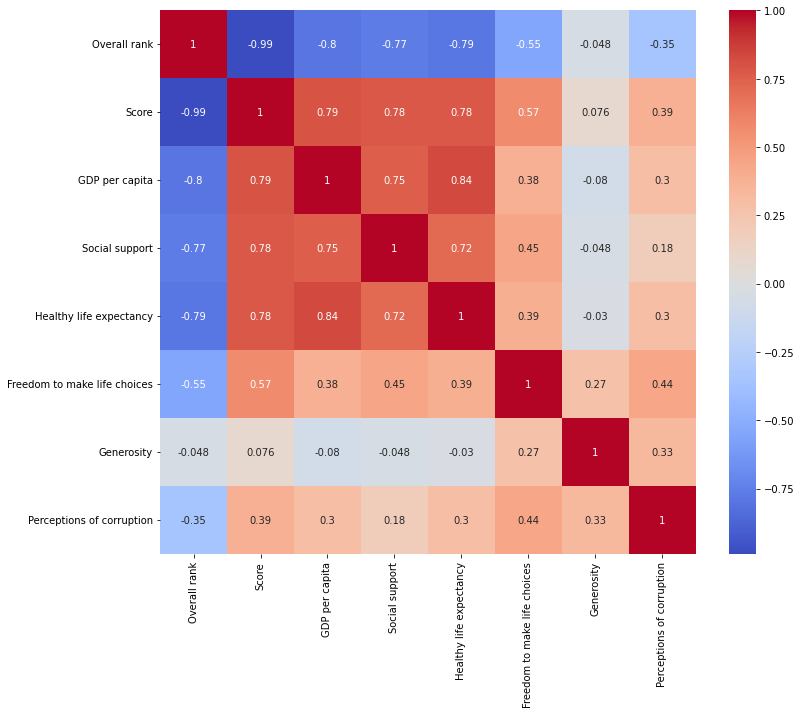

In [9]:
fig = plt.figure(figsize = (12, 10))
sns.heatmap(df2019.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

## We can see that GDP per capita and Healthy life expectancy are highly correlated to each other. Also GDP per capita and Social support is also correlated. This means that the country with better GDP also contributes to Healthy life and social support which eventually contributes to the country's happiness. Hence better is the GDP better will be the overall happiness score.

<br>

In [10]:
GDP2015=df2015["Economy (GDP per Capita)"].mean()
GDP2016=df2016["Economy (GDP per Capita)"].mean()
GDP2017=df2017["Economy..GDP.per.Capita."].mean()
GDP2018=df2018["GDP per capita"].mean()
GDP2019=df2019["GDP per capita"].mean()
GDP=np.array([GDP2015,GDP2016,GDP2017,GDP2018,GDP2019])
x=np.arange(2015,2020,1)
y=GDP

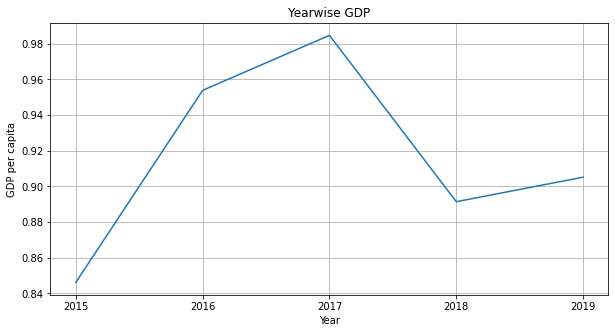

In [11]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.title("Yearwise GDP")
plt.xlabel("Year")
plt.ylabel("GDP per capita")
plt.xticks(x, x)
plt.plot(x,y)
plt.show()

## We can see that the contribution of GDP to happiness kept increasing from 2015 to 2017 then decreased in 2018 and again increased in 2019

<br>

In [12]:
df2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
df2019.sort_values(by="Perceptions of corruption",ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
...,...,...,...,...,...,...,...,...,...
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
47,48,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004


## The countries with highest Impact of Perceptions of Corruption on Happiness Score are ranked much better as compared to other countries. This implements that the lesser is the corruption, happier is the country. Hence the focus should be to eliminate the corruption to make the country happier

<br>

In [14]:
df2019region=pd.merge(df2019,df2016[["Country","Region"]],left_on="Country or region",right_on="Country",how="left")

In [15]:
df2019region.groupby('Region')["Score"].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.267500
North America                      7.085000
Western Europe                     6.898400
Latin America and Caribbean        5.942550
Eastern Asia                       5.688833
Central and Eastern Europe         5.571786
Southeastern Asia                  5.273667
Middle East and Northern Africa    5.237000
Southern Asia                      4.526857
Sub-Saharan Africa                 4.340657
Name: Score, dtype: float64

In [16]:
df2019region.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Country                         8
Region                          8
dtype: int64

In [17]:
df2019region[df2019region["Region"].isna()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,Region
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,NaN,NaN
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,NaN,NaN
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,NaN,NaN
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,NaN,NaN
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,NaN,NaN
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,NaN,NaN
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,NaN,NaN
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN,NaN


In [18]:
df2019region.loc[df2019region['Country or region'] == 'Trinidad & Tobago','Region'] = df2019region.loc[df2019region['Country or region'] == 'Trinidad & Tobago','Region'].fillna(value="Latin America and Caribbean")
df2019region.loc[df2019region['Country or region'] == 'Northern Cyprus','Region'] = df2019region.loc[df2019region['Country or region'] == 'Northern Cyprus','Region'].fillna(value="Western Europe")
df2019region.loc[df2019region['Country or region'] == 'North Macedonia','Region'] = df2019region.loc[df2019region['Country or region'] == 'North Macedonia','Region'].fillna(value="Central and Eastern Europe")
df2019region.loc[df2019region['Country or region'] == 'Somalia','Region'] = df2019region.loc[df2019region['Country or region'] == 'Somalia','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Namibia','Region'] = df2019region.loc[df2019region['Country or region'] == 'Namibia','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Gambia','Region'] = df2019region.loc[df2019region['Country or region'] == 'Gambia','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'South Sudan','Region'] = df2019region.loc[df2019region['Country or region'] == 'South Sudan','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Mozambique','Region'] = df2019region.loc[df2019region['Country or region'] == 'Mozambique','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Swaziland','Region'] = df2019region.loc[df2019region['Country or region'] == 'Swaziland','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Lesotho','Region'] = df2019region.loc[df2019region['Country or region'] == 'Lesotho','Region'].fillna(value="Sub-Saharan Africa")
df2019region.loc[df2019region['Country or region'] == 'Central African Republic','Region'] = df2019region.loc[df2019region['Country or region'] == 'Central African Republic','Region'].fillna(value="Sub-Saharan Africa")


In [19]:
df2019region.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Country                         8
Region                          0
dtype: int64

In [20]:
df2019region.groupby('Region')[["Score","GDP per capita","Social support","Healthy life expectancy", "Freedom to make life choices","Generosity","Perceptions of corruption"]].mean().sort_values(by="Score",ascending=False)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Region,,,,,,,
Australia and New Zealand,7.267500,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000
North America,7.085000,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000
Western Europe,6.842190,1.357333,1.472857,1.015190,0.479429,0.219619,0.218381
Latin America and Caribbean,5.954429,0.924286,1.339714,0.811857,0.440905,0.144619,0.072048
Eastern Asia,5.688833,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667
Central and Eastern Europe,5.561517,1.021069,1.338793,0.809517,0.357517,0.142724,0.061759
Southeastern Asia,5.273667,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444
Middle East and Northern Africa,5.237000,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000
Southern Asia,4.526857,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429


## As we can see for the top 3 region have major contribution of GDP per capita, Social support and Healthy life expectancy in Happiness score. Hence Australia and New Zealand, North America and Western Europe has better GDP, good healthy life expectancy and great social support

<br>

In [21]:
df2015.head(0)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [22]:
df2016.head(0)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [23]:
df2017.head(0)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [24]:
df2018.head(0)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [25]:
df2019.head(0)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


Text(0.5, 0, 'Year')

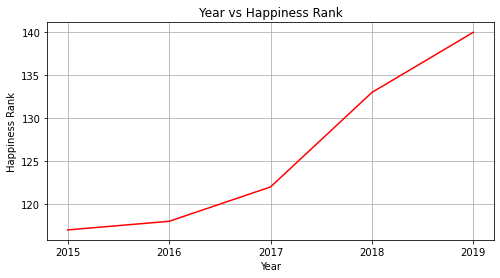

In [26]:
Rank2015=df2015[df2015['Country']=="India"]["Happiness Rank"]
Rank2016=df2016[df2016['Country']=="India"]["Happiness Rank"]
Rank2017=df2017[df2017['Country']=="India"]["Happiness.Rank"]
Rank2018=df2018[df2018['Country or region']=="India"]["Overall rank"]
Rank2019=df2019[df2019['Country or region']=="India"]["Overall rank"]
IndiaRank=np.array([Rank2015,Rank2016,Rank2017,Rank2018,Rank2019])
years=[2015,2016,2017,2018,2019]
x=np.array(years)
z=IndiaRank
fig,axes=plt.subplots(figsize=(8,4))
plt.xticks(x, x)
axes.plot(x,z,color="red")
axes.grid(True)
axes.set_ylabel("Happiness Rank")
axes.set_title("Year vs Happiness Rank")
axes.set_xlabel("Year")

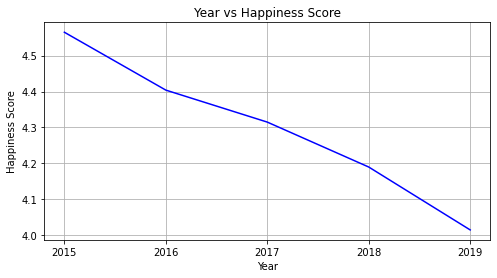

In [27]:
Score2015=df2015[df2015['Country']=="India"]["Happiness Score"]
Score2016=df2016[df2016['Country']=="India"]["Happiness Score"]
Score2017=df2017[df2017['Country']=="India"]["Happiness.Score"]
Score2018=df2018[df2018['Country or region']=="India"]["Score"]
Score2019=df2019[df2019['Country or region']=="India"]["Score"]
IndiaScore=np.array([Score2015,Score2016,Score2017,Score2018,Score2019])
y=IndiaScore
fig,axes=plt.subplots(figsize=(8,4))
plt.xticks(x, x)
axes.grid(True)
axes.set_title("Year vs Happiness Score")
axes.set_ylabel("Happiness Score")
axes.set_xlabel("Year")
axes.plot(x,y,color="blue")

## For India, the happiness rank has kept getting worst every year which can be seen in 1st plot and score has kept decresing which can be seen in 2nd plot.

<br>

In [28]:
df2019_Generosity=df2019.copy()

In [29]:
df2019_Generosity["Generosity fraction"]=df2019_Generosity["Generosity"]/df2019_Generosity["Score"]*100

In [30]:
df2019_Generosity.sort_values(by="Generosity fraction",ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Generosity fraction
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,12.981651
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,11.648596
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028,9.591680
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,9.560947
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,8.542247
...,...,...,...,...,...,...,...,...,...,...
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042,0.699301
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,0.691244
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182,0.672043
19,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,0.671337


## The countries which have highest impact of Generosity on happiness score are ranked worst in the Happiness ranking. This implements that the country being generous is not equal to country being happy

<br>

In [31]:
MeanScore2015=df2015["Happiness Score"].mean()
MeanScore2016=df2016["Happiness Score"].mean()
MeanScore2017=df2017["Happiness.Score"].mean()
MeanScore2018=df2018["Score"].mean()
MeanScore2019=df2019["Score"].mean()
MeanScore=np.array([MeanScore2015,MeanScore2016,MeanScore2017,MeanScore2018,MeanScore2019])

In [32]:
MeanScore

array([5.37573418, 5.38218471, 5.35401936, 5.37591667, 5.40709615])

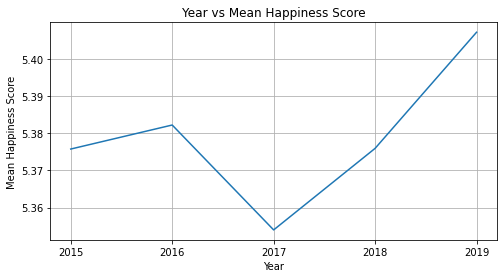

In [33]:
y=MeanScore
fig,axes=plt.subplots(figsize=(8,4))
years=[2015,2016,2017,2018,2019]
x=np.array(years)
plt.xticks(x, x)
axes.grid(True)
axes.set_title("Year vs Mean Happiness Score")
axes.set_ylabel("Mean Happiness Score")
axes.set_xlabel("Year")
axes.plot(x,y)

## Except in 2017, the mean happiness score has kept increasing every year